# Objective: 
    
In this notebook, we will build a neural network to classifiy the image based on the object present in the image.

# Dataset Info:
    
MNIST database of handwritten digits
Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

Source: https://www.kaggle.com/warisali2/mnist-database-of-handwritten-digits

# Advanced techniques for training neural networks:
    
Weight Initialization

Nonlinearity (different Activation functions)

Optimizers(different optimizers)

Batch Normalization

Dropout

### 1. Load Libraries and dataset and do experimentation on dataset

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

In [206]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [207]:
X_train.shape

(60000, 28, 28)

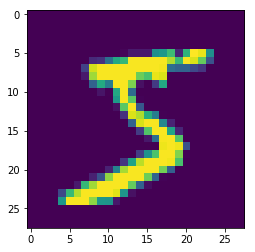

Label:  7


In [208]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

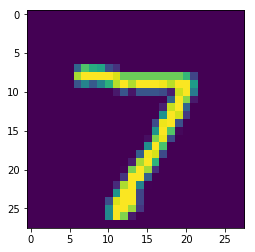

Label:  7


In [209]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

### 2. Data Pre-processing

In [210]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [211]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [212]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


### 3. Basic NN model

#### Naive MLP model without any alterations

In [213]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten

In [214]:
model = Sequential()

In [215]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [216]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [217]:
history = model.fit(X_train, y_train, batch_size = 2, epochs = 10, verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 63s 1ms/step - loss: 1.7586 - acc: 0.3760
Epoch 2/10
60000/60000 [==============================] - 78s 1ms/step - loss: 1.5209 - acc: 0.4368
Epoch 3/10
60000/60000 [==============================] - 66s 1ms/step - loss: 1.4157 - acc: 0.4699
Epoch 4/10
60000/60000 [==============================] - 71s 1ms/step - loss: 1.2316 - acc: 0.5443
Epoch 5/10
60000/60000 [==============================] - 72s 1ms/step - loss: 1.2443 - acc: 0.5231
Epoch 6/10
60000/60000 [==============================] - 70s 1ms/step - loss: 1.1911 - acc: 0.5621
Epoch 7/10
60000/60000 [==============================] - 71s 1ms/step - loss: 1.1653 - acc: 0.5733
Epoch 8/10
60000/60000 [==============================] - 75s 1ms/step - loss: 1.1628 - acc: 0.5632
Epoch 9/10
60000/60000 [==============================] - 68s 1ms/step - loss: 1.1377 - acc: 0.5782
Epoch 10/10
60000/60000 [==============================] - 67s 1ms/step - loss: 1.1357 - acc: 0.5851

In [218]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 61us/step


In [219]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5529


## Now, we will train Neural network using below techniques

### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem 
up to some degree

Ref: https://keras.io/initializers/

In [223]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [224]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
60000/60000 [==============================] - 2s 33us/step - loss: 2.5184 - acc: 0.1022
Epoch 2/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.4409 - acc: 0.1022
Epoch 3/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.3877 - acc: 0.1022
Epoch 4/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.3501 - acc: 0.1023
Epoch 5/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.3254 - acc: 0.1036
Epoch 6/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.3107 - acc: 0.1083
Epoch 7/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.3029 - acc: 0.1124
Epoch 8/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2990 - acc: 0.1164
Epoch 9/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2970 - acc: 0.1217
Epoch 10/100
60000/60000 [==============================] - 1s 17us/step - loss: 2.2959 - a

In [225]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 66us/step


In [226]:
print('Test accuracy: ', results[1])

Test accuracy:  0.3952


### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://keras.io/activations/

In [229]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [230]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 5s 90us/step - loss: 1.1335 - acc: 0.7903
Epoch 2/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.3403 - acc: 0.9016
Epoch 3/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2647 - acc: 0.9216
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2272 - acc: 0.9325
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.2015 - acc: 0.9397
Epoch 6/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1822 - acc: 0.9455
Epoch 7/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1699 - acc: 0.9489
Epoch 8/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.1590 - acc: 0.9523
Epoch 9/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1488 - acc: 0.9544
Epoch 10/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1404 - acc: 0.957

In [231]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 72us/step


In [232]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9444


### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [233]:
from keras.layers import BatchNormalization, Dropout

Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [234]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [235]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)

Epoch 1/20
60000/60000 [==============================] - ETA: 0s - loss: 1.5267 - acc: 0.532 - 10s 165us/step - loss: 1.5250 - acc: 0.5337
Epoch 2/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.8726 - acc: 0.7823
Epoch 3/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.6383 - acc: 0.8363
Epoch 4/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.5240 - acc: 0.8614
Epoch 5/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.4593 - acc: 0.8760
Epoch 6/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.4124 - acc: 0.8859
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.3751 - acc: 0.8968
Epoch 8/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.3543 - acc: 0.9017
Epoch 9/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.3301 - acc: 0.9063
Epoch 10/20
60000/60000 [===========================

In [236]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 107us/step


In [237]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9539


### 4. Dropout

In [238]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [239]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.7666 - acc: 0.7634
Epoch 2/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.4417 - acc: 0.8730
Epoch 3/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.3661 - acc: 0.8956
Epoch 4/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.3252 - acc: 0.9065
Epoch 5/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.3009 - acc: 0.9150
Epoch 6/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.2866 - acc: 0.9177
Epoch 7/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.2692 - acc: 0.9236
Epoch 8/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.2569 - acc: 0.9263
Epoch 9/10
60000/60000 [==============================] - 11s 177us/ste

In [240]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 221us/step


In [241]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9696
